# Random Forest.

Como su nombre indica, es conocido como bosques aleatorios. Es una combinación de árboles predictores tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos.<br>
Es un modelo muy usado, ya que da muy buenos resultados en muchos problemas. Puede ser usado como clasificador o como regresor.<br>
Un árbol: Propenso al overfitting.<br>
Varios árboles: Más estable, mejor generalización.<br>
El ensamblamiento de los árboles debe ser diverso.

Los parámetros clave de este modelo son:<br>
* n_estimators: Número de árboles que se usa en el ensamblaje.
* max_features: Tiene un gran poder en el entrenamiento.
* max_depth: Controla la profundidad de cada árbol.
* n_jobs: Cuántos núcleos se usa en paralelo durante el entrenamiento.

La predicción usando Random Forest se realiza:<br>
<ol>
  <li>Se hace una predicción con cada árbol.</li>
  <li>Combina cada predicción:</li>
    <ol>
        <li>Regresión: La media de cada uno.
        <li>Clasificación:
            <ol>
                <li>Cada árbol da una probabilidad para cada clase.
                <li>La probabilidad se estabiliza a través de los árboles.
                <li>Predice la clase con mayor probabilidad.
            </ol>
    </ol>
</ol>

<IPython.core.display.Javascript object>


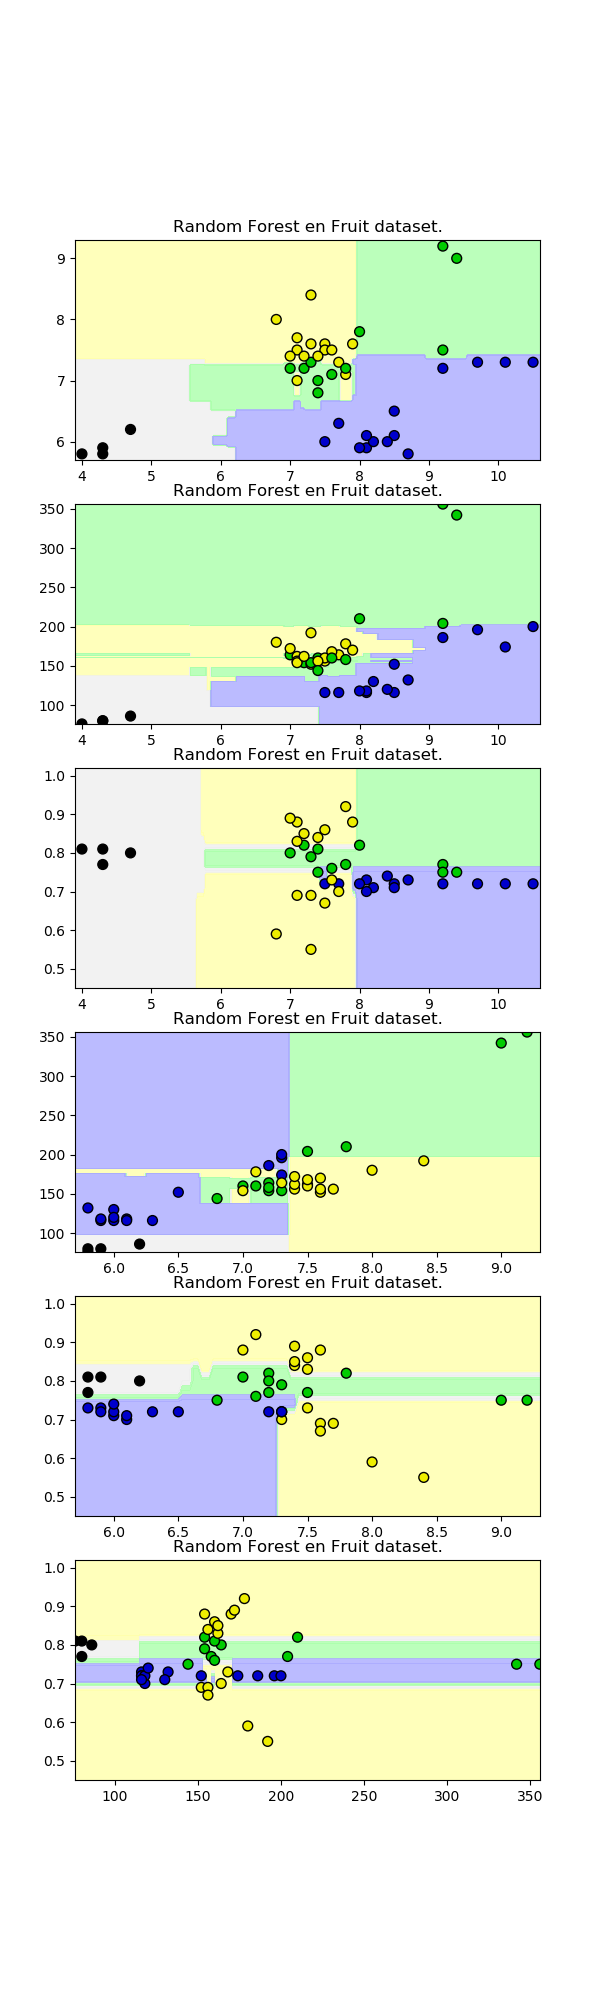

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
import warnings
warnings.filterwarnings('ignore')

fruits=pd.read_table('fruit_data_with_colors.txt')

X=fruits[['height','width','mass','color_score']]
y=fruits['fruit_label']
target_names_fruits=['apple','mandarin','orange','lemon']

X_train,X_test,y_train,y_test=train_test_split(X.as_matrix(),y.as_matrix(),random_state=0)

fig,subaxes=plt.subplots(6,1,figsize=(6,20))

title='Random Forest en Fruit dataset.'
pair_list=[[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]

for pair,axis in zip(pair_list,subaxes):
    X=X_train[:,pair]
    y=y_train
    
    clf=RandomForestClassifier().fit(X,y)
    plot_class_regions_for_classifier_subplot(clf,X,y,None,None,title,axis,)